In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


# Curve Fitting with a Neuronal Network

We consider a simple linear model $y = kx + d + w$ where $w$ is some noise

In [31]:
xin = np.linspace(-5, 5, 10)
yin = 0.3 * xin + 5.4 + np.random.rand(10)

In [32]:
x = torch.tensor(xin).float().unsqueeze(1)
y = torch.tensor(yin).float().unsqueeze(1)

In [33]:
x, y

(tensor([[-5.0000],
         [-3.8889],
         [-2.7778],
         [-1.6667],
         [-0.5556],
         [ 0.5556],
         [ 1.6667],
         [ 2.7778],
         [ 3.8889],
         [ 5.0000]]),
 tensor([[4.1769],
         [4.9023],
         [5.2730],
         [5.7716],
         [6.0497],
         [5.8594],
         [6.6774],
         [6.9086],
         [7.0617],
         [7.4329]]))

## Linear Model

In [34]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [47]:
out = linear_model(x)

In [36]:
def loss_fn(x, y):
    squared_diffs = (x - y)**2
    return squared_diffs.mean()

In [48]:
loss_fn(x, out)

tensor(41.1173, grad_fn=<MeanBackward0>)

In [37]:
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    for epoch in range(1, n_epochs + 1):
        y_p = model(x)
        loss_train = loss_fn(y_p, y)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")

In [38]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = linear_model, loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 1, Training loss 36.9577
Epoch 1000, Training loss 0.0387
Epoch 2000, Training loss 0.0387
Epoch 3000, Training loss 0.0387
Epoch 4000, Training loss 0.0387
Epoch 5000, Training loss 0.0387


In [39]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3007]], requires_grad=True),
 Parameter containing:
 tensor([6.0113], requires_grad=True)]

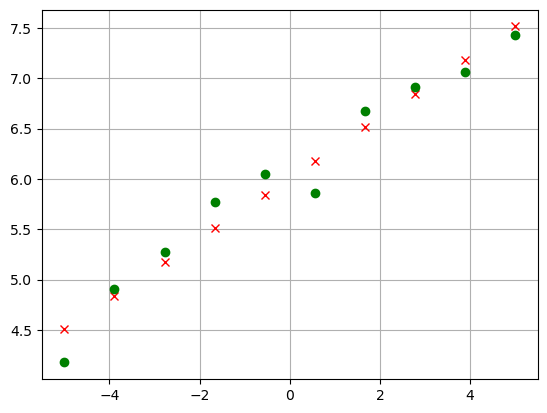

In [40]:
plt.plot(x, linear_model(x).detach().numpy(), 'rx')
plt.plot(xin, yin, 'go')
plt.grid()

## Non-linear Model

In [41]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13,1))

In [42]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

In [45]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 1, Training loss 0.0114
Epoch 1000, Training loss 0.0098
Epoch 2000, Training loss 0.0085
Epoch 3000, Training loss 0.0075
Epoch 4000, Training loss 0.0066
Epoch 5000, Training loss 0.0060


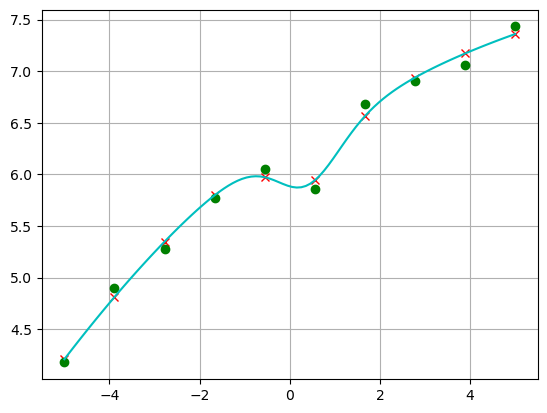

In [46]:
t_range = torch.linspace(-5, 5, steps = 100).unsqueeze(1)

plt.plot(x, seq_model(x).detach().numpy(), 'rx')
plt.plot(x, y, 'go')

plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'c-')

plt.grid()